# Download Data

In [11]:
import kagglehub
import shutil
import os

# Download the latest version
dataset_handle = "mahatiratusher/heart-disease-risk-prediction-dataset"
path = kagglehub.dataset_download(dataset_handle)

# Define the desired download directory
download_directory = r"C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction\data"

# Ensure the download directory exists
os.makedirs(download_directory, exist_ok=True)

# Move the dataset to the desired directory
shutil.move(path, download_directory)

print("Dataset moved to:", os.path.join(download_directory, os.path.basename(path)))


100%|██████████| 1.38M/1.38M [00:00<00:00, 8.79MB/s]

Extracting files...


Dataset moved to: C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction\data\2


# Read the dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
%pwd

'c:\\Users\\wmate\\OneDrive\\UNFC\\Term 2\\Predictive Analytics\\Heart_Disease_Risk_Prediction\\Notebooks'

In [12]:
path_data="..//data/2/heart_disease_risk_dataset_earlymed.csv"
df=pd.read_csv(path_data)
df.head()

,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


In [13]:
print(df.shape)

(70000, 19)


# Visualization Data


In [14]:
import sys
import os

# Get the absolute path of the project root (modify if needed)
project_root = os.path.abspath(r"C:\Users\wmate\OneDrive\UNFC\Term 2\Predictive Analytics\Heart_Disease_Risk_Prediction")  # Adjust this based on your project structure

# Add the project root to sys.path
sys.path.append(project_root)

# Now try importing
from src.visualizations import binary_dashboard

In [15]:
print(df.columns)

Index(['Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk'],
      dtype='object')


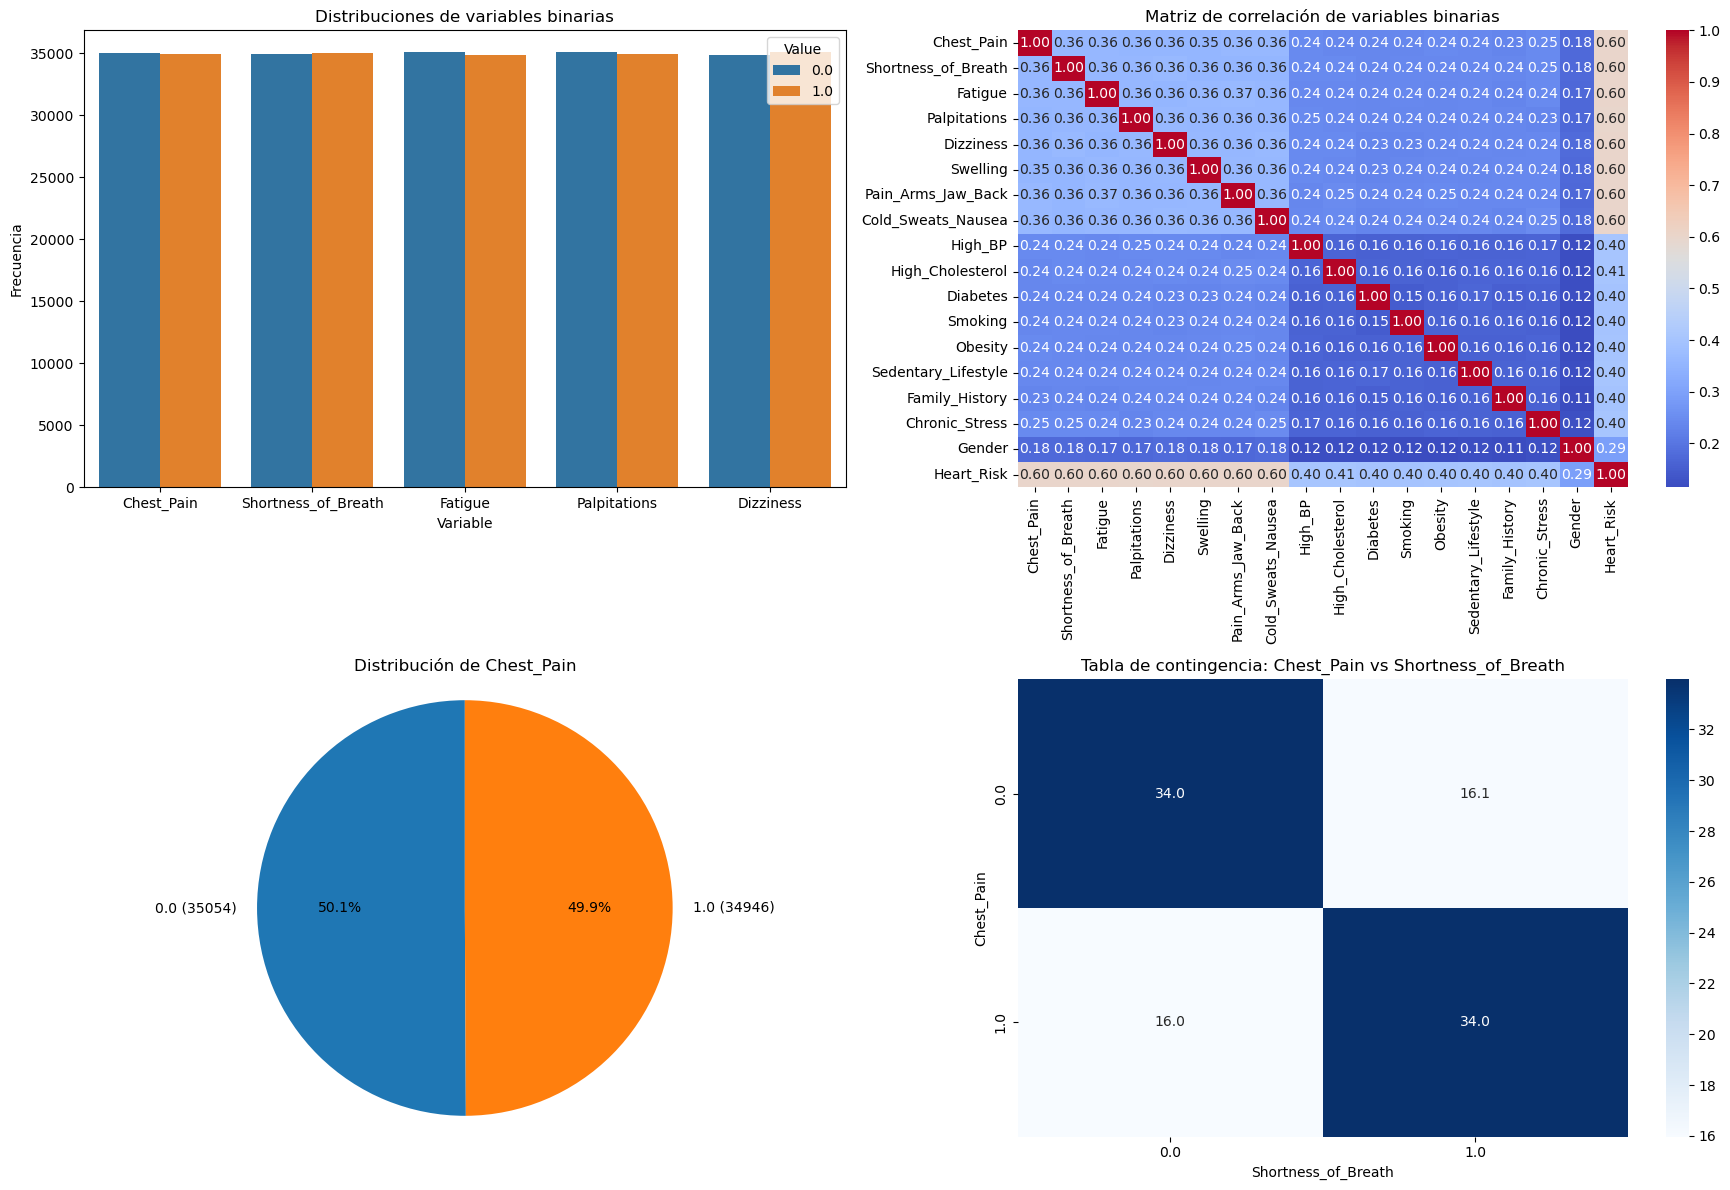

In [16]:
# Plot the correlation matrix
binary_dashboard(df)